# **Laptop Price Prediction**

**Importing Libraries**

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Loading DataSet**

In [2]:
df = pd.read_csv('/content/laptop_data.csv')

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


**Data Cleaning**

In [4]:
df.shape

(1303, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


**Dropping unnecessary columms**

In [6]:
df.drop(columns=['Unnamed: 0'],inplace=True)

**Cleaning Ram and Weight column**

In [7]:
df['Ram'] = df['Ram'].str.replace('GB', '')

In [8]:
df['Weight'] = df['Weight'].str.replace('kg','')

**Changing their Dtypes**

In [9]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

# **Exploratory Data Analysis**

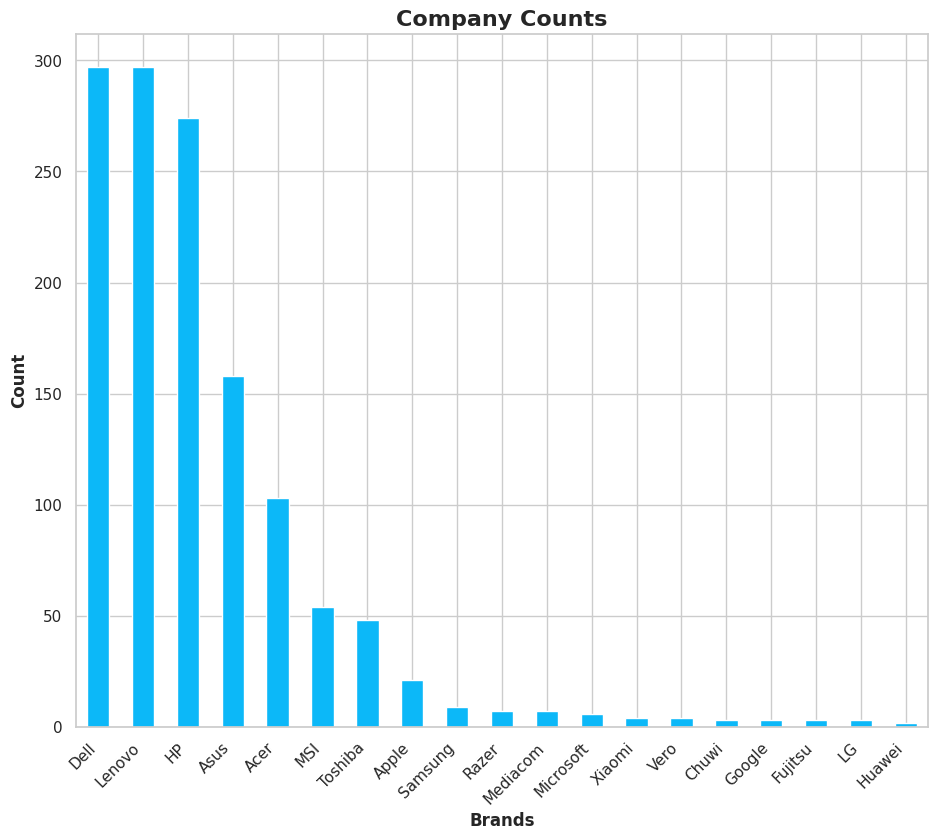

In [50]:
company_counts = df['Company'].value_counts()
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(11, 9))
ax = company_counts.plot(kind='bar', color='#0CB8F8')

ax.set_title('Company Counts', fontweight='bold', fontsize=16)
ax.set_xticklabels(company_counts.index, rotation=45, ha='right')

ax.set_xlabel('Brands', fontweight='bold')
ax.set_ylabel('Count', fontweight='bold')

plt.show()

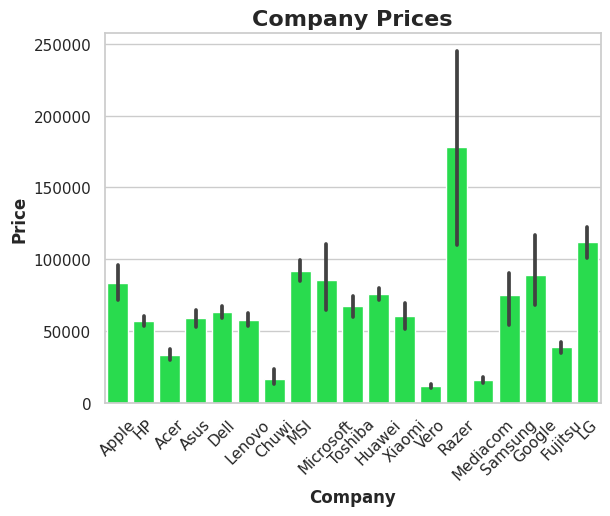

In [49]:
sns.barplot(x=df['Company'], y=df['Price'], color='#0CF83C')

plt.title('Company Prices', fontweight='bold', fontsize=16)

plt.xticks(rotation=45)
plt.xlabel('Company', fontweight='bold')
plt.ylabel('Price', fontweight='bold')
sns.set(style='whitegrid')
plt.show()


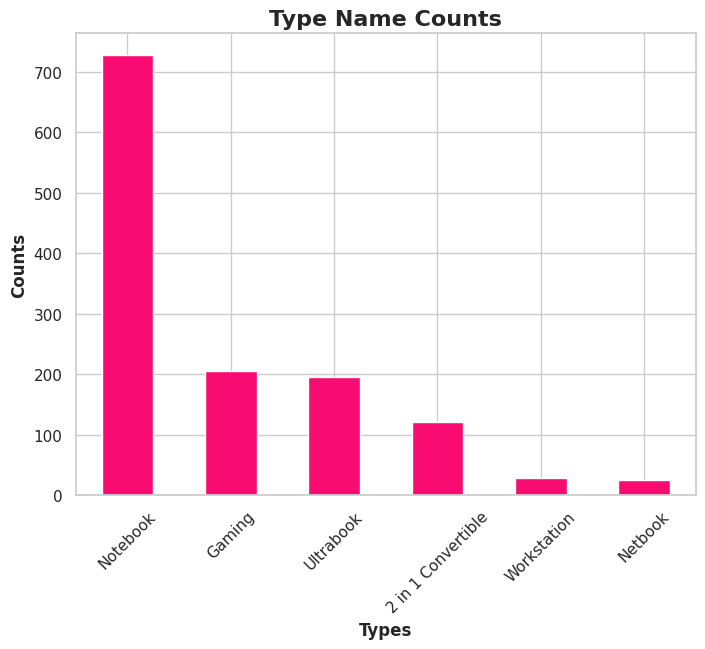

In [48]:
type_counts = df['TypeName'].value_counts()

fig, ax = plt.subplots(figsize=(8, 6))
ax = type_counts.plot(kind='bar', color='#F80C71')

ax.set_title('Type Name Counts', fontweight='bold', fontsize=16)

ax.set_xlabel('Types', fontweight='bold')
ax.set_ylabel('Counts', fontweight='bold')

plt.xticks(rotation=45)
sns.set(style='whitegrid')
plt.show()

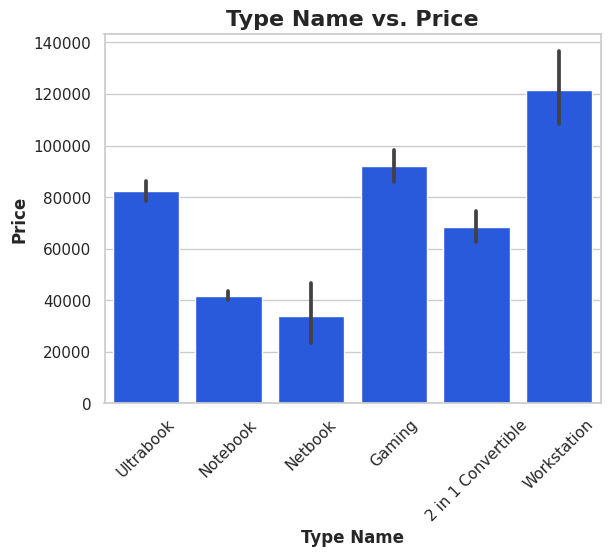

In [47]:
sns.barplot(x=df['TypeName'], y=df['Price'], color='#0C4DF8')

plt.title('Type Name vs. Price', fontweight='bold', fontsize=16)
plt.xlabel('Type Name', fontweight='bold')
plt.ylabel('Price', fontweight='bold')

plt.xticks(rotation=45)
sns.set(style='whitegrid')
plt.show()


In [14]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [15]:
df['Touchscreen'] = df['ScreenResolution'].str.contains('Touchscreen').astype(int)

In [16]:
df.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
395,HP,Ultrabook,15.6,Full HD 1920x1080,AMD A9-Series 9420 3GHz,4,256GB SSD,AMD Radeon 520,Windows 10,1.91,26586.7200,0
558,HP,Notebook,15.6,IPS Panel Full HD 1920x1080,AMD A10-Series A10-9620P 2.5GHz,6,128GB SSD,AMD Radeon 530,Windows 10,1.91,30310.9920,0
1039,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.64,53839.9728,0


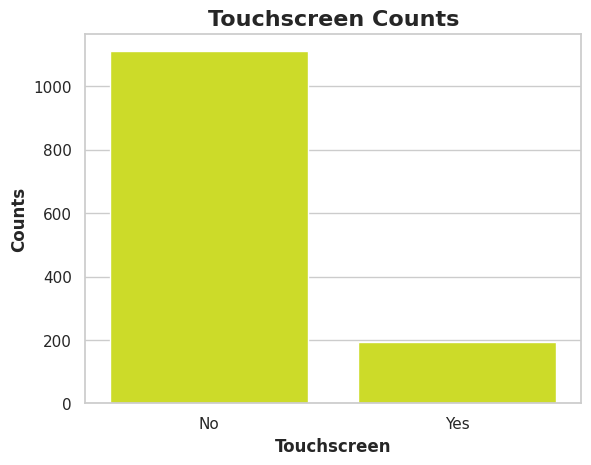

In [51]:
sns.countplot(x=df['Touchscreen'], color='#E4F80C')

plt.title('Touchscreen Counts', fontweight='bold', fontsize=16)
plt.xlabel('Touchscreen', fontweight='bold')
plt.ylabel('Counts', fontweight='bold')
sns.set(style='whitegrid')
plt.xticks([0, 1], ['No', 'Yes'])

plt.show()

In [18]:
df['Ips'] = df['ScreenResolution'].str.contains('IPS').astype(int)

In [19]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
424,Dell,Gaming,17.3,IPS Panel 2560x1440,Intel Core i7 7820HK 2.9GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,149130.7200,0,1
279,Lenovo,Notebook,17.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,2TB HDD,Nvidia GeForce MX150,No OS,2.80,45234.7200,0,0
8,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Nvidia GeForce MX150,Windows 10,1.30,79653.6000,0,0
545,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,4,128GB SSD,Intel HD Graphics 620,Windows 10,2.10,37589.0400,0,0
635,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,1TB HDD,Nvidia GeForce GTX 1050,Windows 10,1.99,48304.7136,0,0


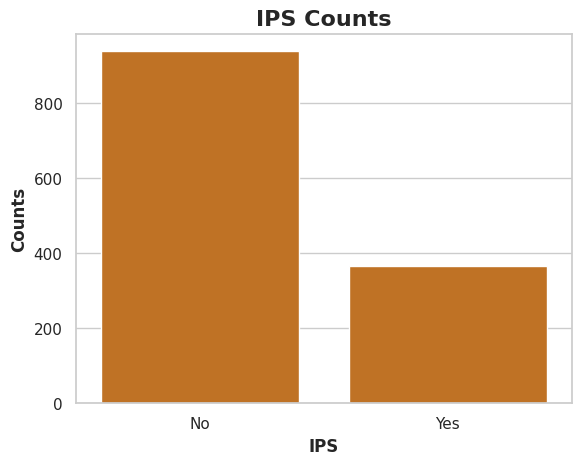

In [52]:
sns.countplot(x=df['Ips'], color='#D9720B')

plt.title('IPS Counts', fontweight='bold', fontsize=16)
plt.xlabel('IPS', fontweight='bold')
plt.ylabel('Counts', fontweight='bold')
sns.set(style='whitegrid')
plt.xticks([0, 1], ['No', 'Yes'])

plt.show()

In [21]:
df[['X_res', 'Y_res']] = df['ScreenResolution'].str.split('x', n=1, expand=True)

In [22]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
1101,Dell,Ultrabook,12.5,1366x768,Intel Core i3 6100U 2.3GHz,4,128GB SSD,Intel HD Graphics 520,Windows 7,1.50,62176.1616,0,0,1366,768
420,Lenovo,2 in 1 Convertible,15.6,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.00,101178.7200,1,1,IPS Panel 4K Ultra HD / Touchscreen 3840,2160
1175,Asus,Notebook,14.0,Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,4,256GB SSD,Intel HD Graphics 620,Windows 10,2.00,40972.3200,0,0,Full HD 1920,1080
803,Dell,Notebook,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel Core i5 7300HQ 2.5GHz,8,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.06,93186.7200,1,0,4K Ultra HD / Touchscreen 3840,2160
642,Lenovo,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.14,130536.0000,0,1,IPS Panel Full HD 1920,1080


In [23]:
df['X_res'] = df['X_res'].str.extract(r'(\d+\.?\d+)')

In [24]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [25]:
diagonal_resolution = (df['X_res']**2 + df['Y_res']**2)**0.5
df['ppi'] = (diagonal_resolution / df['Inches']).astype(float)

In [26]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
1132,Asus,Notebook,14.0,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.50,14811.840,0,0,1366,768,111.935204
324,Acer,Notebook,15.6,1366x768,AMD A12-Series 9720P 2.7GHz,8,256GB SSD,AMD Radeon RX 540,Windows 10,2.20,35111.520,0,0,1366,768,100.454670
1000,Acer,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.70,67132.800,0,1,1920,1080,141.211998
800,HP,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia Quadro M2200,Windows 10,3.14,110017.872,0,0,1920,1080,141.211998
196,Razer,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32,1TB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49,324954.720,1,0,3840,2160,254.671349


In [27]:
# Dropping Screen resolution column

df.drop(columns=['ScreenResolution'],inplace=True)

In [28]:
# Dropping both X_res and Y_res columns

df.drop(columns=['Inches','X_res','Y_res'],inplace=True)

In [29]:
df.head(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998


In [30]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [31]:
def get_cpu_name(cpu_value):
    cpu_words = cpu_value.split()
    first_three_words = cpu_words[:3]
    cpu_name = " ".join(first_three_words)
    return cpu_name

In [32]:
df['Cpu Name'] = df['Cpu'].apply(get_cpu_name)

In [33]:
df.head(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5


In [34]:
def fetch_processor(text):
    if text in ['Intel Core i7', 'Intel Core i5', 'Intel Core i3']:
        return text
    elif text.split()[0] == 'Intel':
        return 'Other Intel Processor'
    else:
        return 'AMD Processor'

In [35]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [36]:
df.sample(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
210,Acer,Notebook,Intel Core i7 7700HQ 2.8GHz,8,1TB HDD,Nvidia GeForce GTX 1050,Linux,2.40,41505.1200,0,0,141.211998,Intel Core i7,Intel Core i7
394,Dell,Notebook,Intel Core i7 7500U 2.7GHz,8,256GB SSD,AMD Radeon R7 M445,Linux,2.33,41498.1936,0,0,141.211998,Intel Core i7,Intel Core i7
129,HP,Notebook,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,2.50,49443.8400,0,0,127.335675,Intel Core i5,Intel Core i5


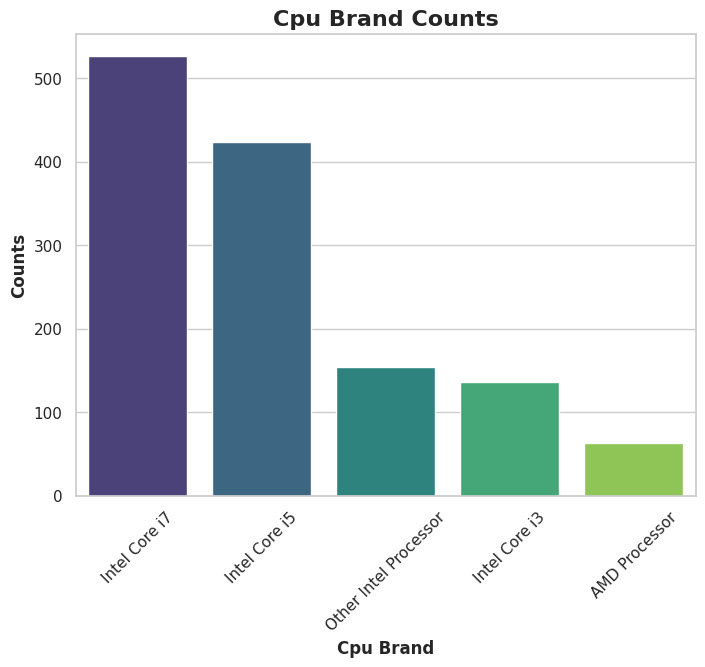

In [46]:
cpu_brand_counts = df['Cpu brand'].value_counts()
sns.set(style='whitegrid')

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cpu_brand_counts.index, y=cpu_brand_counts.values, palette='viridis')

ax.set_title('Cpu Brand Counts', fontweight='bold', fontsize=16)
ax.set_xlabel('Cpu Brand', fontweight='bold')
ax.set_ylabel('Counts', fontweight='bold')

plt.xticks(rotation=45)

plt.show()

In [38]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [39]:
df.head(3)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5


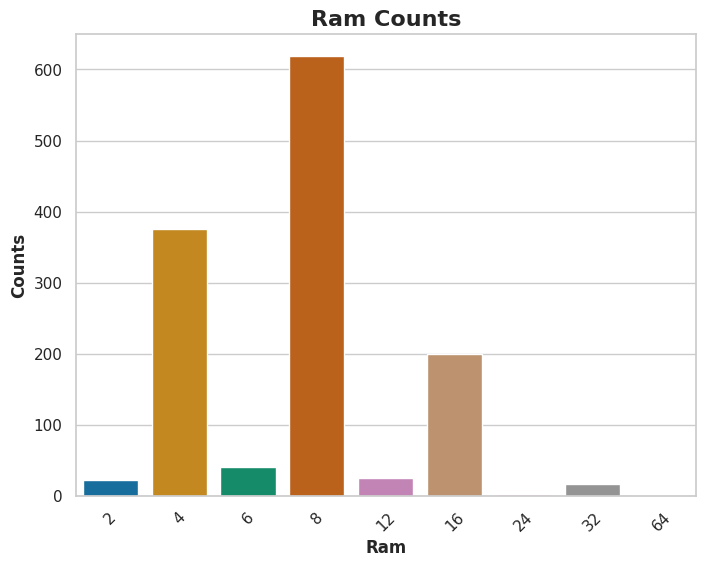

In [45]:
ram_counts = df['Ram'].value_counts()

sns.set(style='whitegrid')

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=ram_counts.index, y=ram_counts.values, palette='colorblind')

ax.set_title('Ram Counts', fontweight='bold', fontsize=16)
ax.set_xlabel('Ram', fontweight='bold')
ax.set_ylabel('Counts', fontweight='bold')

plt.xticks(rotation=45)

plt.show()


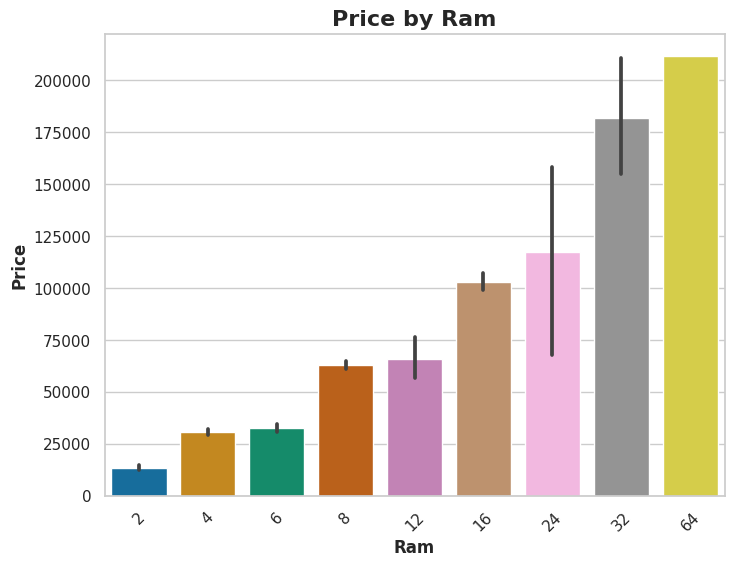

In [43]:
sns.set(style='whitegrid')

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=df['Ram'], y=df['Price'], palette='colorblind')

ax.set_title('Price by Ram', fontweight='bold', fontsize=16)
ax.set_xlabel('Ram', fontweight='bold')
ax.set_ylabel('Price', fontweight='bold')

plt.xticks(rotation=45)

plt.show()

In [53]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [69]:
df['Memory'] = df['Memory'].astype(str).str.replace('\.0', '').str.replace('GB', '').str.replace('TB', '000')

<ipython-input-69-e3742b54d13b>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Memory'] = df['Memory'].astype(str).str.replace('\.0', '').str.replace('GB', '').str.replace('TB', '000')


In [70]:
df[['first', 'second']] = df['Memory'].astype(str).str.split('+', n=1, expand=True)
df['first'] = df['first'].str.strip().str.replace(r'\D', '').astype(int)
df['second'] = df['second'].fillna('0').str.replace(r'\D', '').astype(int)

<ipython-input-70-7ef35f8736ed>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.strip().str.replace(r'\D', '').astype(int)
<ipython-input-70-7ef35f8736ed>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].fillna('0').str.replace(r'\D', '').astype(int)


In [71]:
df['HDD'] = df['first'] * (df['Memory'].str.contains('HDD').astype(int)) + df['second'] * (df['Memory'].str.contains('HDD').astype(int))
df['SSD'] = df['first'] * (df['Memory'].str.contains('SSD').astype(int)) + df['second'] * (df['Memory'].str.contains('SSD').astype(int))
df['Hybrid'] = df['first'] * (df['Memory'].str.contains('Hybrid').astype(int)) + df['second'] * (df['Memory'].str.contains('Hybrid').astype(int))
df['Flash_Storage'] = df['first'] * (df['Memory'].str.contains('Flash Storage').astype(int)) + df['second'] * (df['Memory'].str.contains('Flash Storage').astype(int))


In [72]:
df.drop(columns=['first', 'second'], inplace=True)

In [73]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
432,Lenovo,Notebook,4,128 SSD,Intel HD Graphics 620,Windows 10,1.70,31914.7200,0,1,157.350512,Intel Core i3,0,128,0,0
1227,Dell,Notebook,4,1000 HDD,Intel HD Graphics 520,Linux,2.18,27804.7008,0,0,100.454670,Intel Core i5,1000,0,0,0
1257,Dell,Notebook,4,500 HDD,Intel HD Graphics 520,Windows 10,2.29,26107.2000,0,0,100.454670,Intel Core i3,500,0,0,0
1164,HP,Notebook,4,500 HDD,Intel HD Graphics 520,No OS,2.10,25414.0272,0,0,100.454670,Intel Core i5,500,0,0,0
386,Lenovo,Notebook,4,128 SSD,Intel HD Graphics 620,Windows 10,1.50,29250.7200,0,1,165.632118,Intel Core i3,0,128,0,0


In [74]:
df.drop(columns=['Memory'],inplace=True)

In [76]:
df.corr()['Price']

<ipython-input-76-9447c1bc3d29>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
ppi            0.473487
HDD           -0.024428
SSD            0.529437
Name: Price, dtype: float64

In [75]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [77]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [78]:
df['Gpu brand'] = df['Gpu'].str.split().str[0]

In [79]:
df.sample(3)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
1108,HP,Notebook,4,AMD Radeon R4,Windows 10,2.10,21205.4400,0,0,141.211998,AMD Processor,1000,0,AMD
1008,HP,Notebook,8,Nvidia GeForce 930MX,Windows 10,1.64,55904.5728,0,0,157.350512,Intel Core i5,0,256,Nvidia
367,Lenovo,Gaming,8,Nvidia GeForce GTX 1050,No OS,2.40,43103.5200,0,1,141.211998,Intel Core i5,1128,1128,Nvidia


In [80]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [81]:
df = df[df['Gpu brand'] != 'ARM']

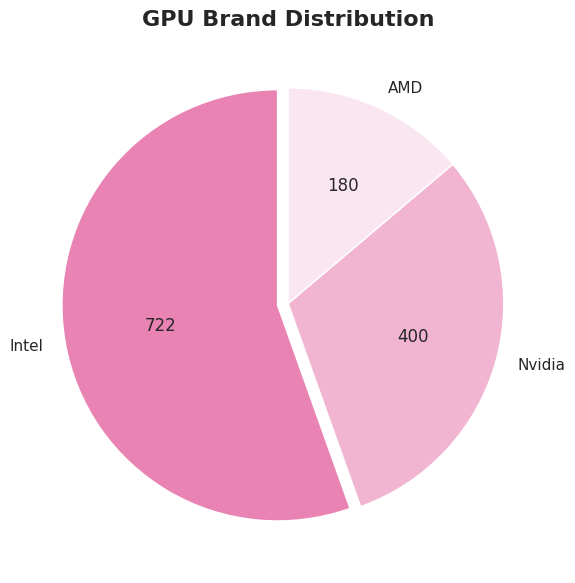

In [99]:
gpu_counts = df['Gpu brand'].value_counts()

plt.figure(figsize=(9, 7))

colors = ['#E883B4', '#F1B5D2', '#FAE6F0']

patches, _ = plt.pie(gpu_counts, labels=gpu_counts.index, explode=(0.05, 0, 0), startangle=90, colors=colors)

plt.title('GPU Brand Distribution', fontweight='bold', fontsize=16)

for patch, count in zip(patches, gpu_counts):
    angle = patch.theta1 + (patch.theta2 - patch.theta1) / 2
    x = patch.r * 0.6 * np.cos(np.deg2rad(angle))
    y = patch.r * 0.6 * np.sin(np.deg2rad(angle))

    plt.text(x, y, str(count), ha='center', va='center')

plt.xticks(fontweight='bold')

plt.show()


In [101]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

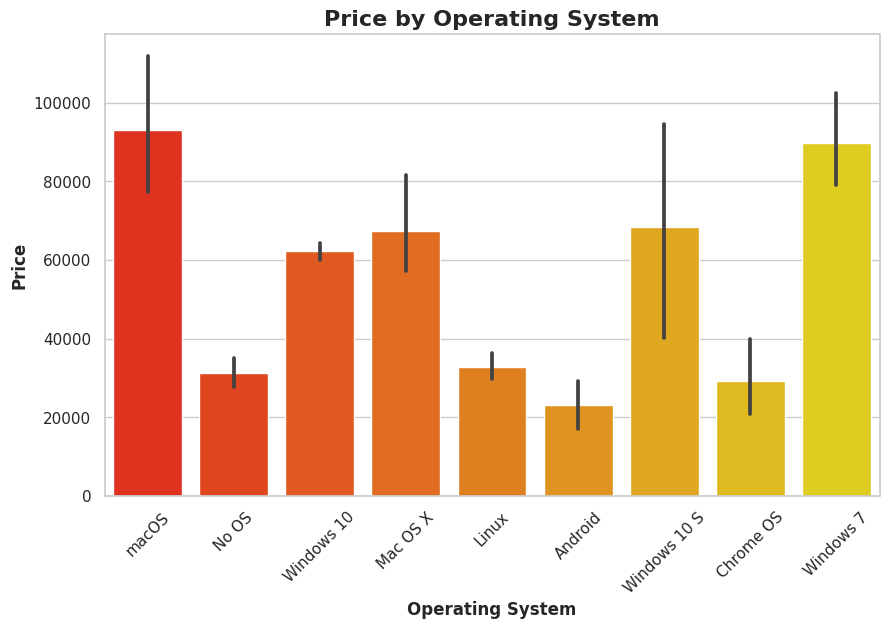

In [104]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.barplot(x=df['OpSys'], y=df['Price'], palette = 'autumn')

plt.title('Price by Operating System', fontweight='bold', fontsize=16)
plt.xlabel('Operating System', fontweight='bold')
plt.ylabel('Price', fontweight='bold')

plt.xticks(rotation= 45)

plt.show()


In [106]:
os_mapping = {
    'Windows 10': 'Windows',
    'Windows 7': 'Windows',
    'Windows 10 S': 'Windows',
    'macOS': 'Mac',
    'Mac OS X': 'Mac'
}

In [107]:
df['os'] = df['OpSys'].map(os_mapping).fillna('Others/No OS/Linux')

In [110]:
df.sample(5)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
772,Toshiba,Notebook,4,Windows 10,1.75,54345.60,0,1,111.935204,Intel Core i5,0,128,Intel,Windows
188,Acer,Ultrabook,8,Windows 10,1.12,52693.92,0,1,165.632118,Intel Core i5,0,256,Intel,Windows
948,Dell,Notebook,4,Windows 10,2.36,35111.52,0,0,106.113062,Intel Core i3,1000,0,AMD,Windows
1014,HP,Notebook,4,Windows 10,1.49,42624.00,0,0,117.826530,Intel Core i3,500,0,Intel,Windows
533,Mediacom,Notebook,4,Windows 10,1.20,19660.32,0,1,165.632118,Other Intel Processor,0,32,Intel,Windows


In [111]:
df.drop(columns=['OpSys'],inplace=True)

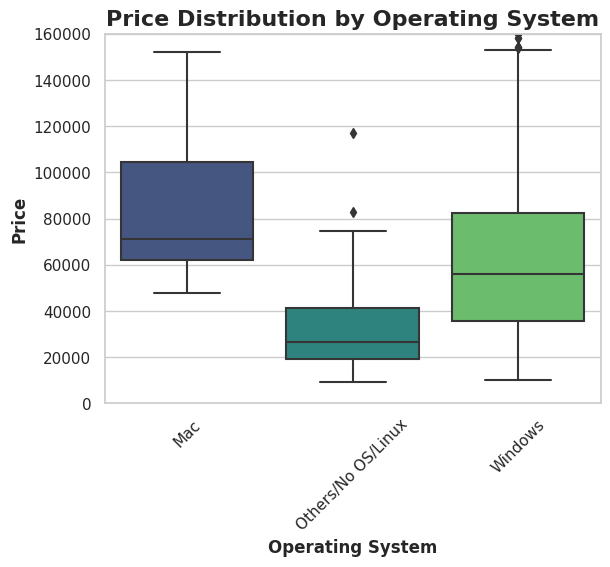

In [120]:
sns.boxplot(x=df['os'], y=df['Price'], palette='viridis')
plt.xticks(rotation='vertical')
plt.ylim(0, 160000)
plt.title('Price Distribution by Operating System', fontweight='bold', fontsize=16)
plt.xlabel('Operating System', fontweight='bold')
plt.ylabel('Price', fontweight='bold')
plt.xticks(rotation= 45)
plt.show()


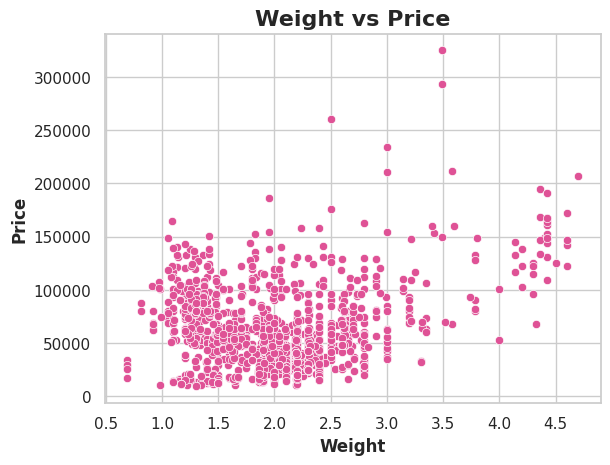

In [123]:
sns.scatterplot(x=df['Weight'], y=df['Price'], c = '#DF5296')
plt.title('Weight vs Price', fontweight='bold', fontsize=16)
plt.xlabel('Weight', fontweight='bold')
plt.ylabel('Price', fontweight='bold')
plt.show()

<ipython-input-129-0aaac1ab8655>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='YlOrRd')


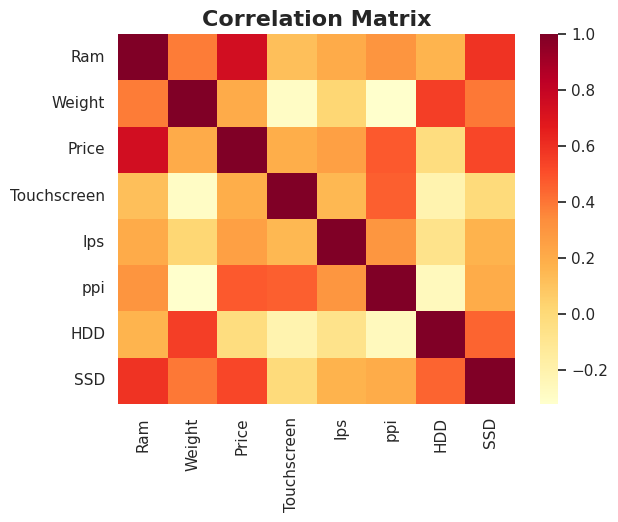

In [129]:
sns.heatmap(df.corr(), cmap='YlOrRd')
plt.title('Correlation Matrix', fontweight='bold', fontsize=16)
plt.show()


# **Training the model**

In [130]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [149]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline

In [132]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [147]:
# Apply one-hot encoding

transformer = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11])
    ],
    remainder='passthrough'
)

In [139]:
X_train_encoded = ct.fit_transform(X_train)
X_test_encoded = ct.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [150]:
pipe = Pipeline([
    ('transformer', transformer),
    ('model', LinearRegression())
])

In [151]:
pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 7, 10, 11])])),
                ('model', LinearRegression())])

In [152]:
y_pred = pipe.predict(X_test)

In [154]:
# Evaluating the model
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.8090942879851168
MAE: 0.2117714518944287


An R2 score of 0.809 indicates that approximately 80.91% of the variance in the logarithm of the price can be explained by the features included in the model.

**Exporting the model**

In [155]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))